In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import pandas as pd

In [2]:
baseballstats = pd.read_csv("https://raw.githubusercontent.com/zoberender/Python-Group-Project/master/Batting.csv")
#It is important to convert NaN to 0 to get calculations to function correctly
baseballstats['IBB'] = baseballstats['IBB'].fillna(0)
baseballstats['HBP'] = baseballstats['HBP'].fillna(0)
baseballstats['SH'] = baseballstats['SH'].fillna(0)
baseballstats['SF'] = baseballstats['SF'].fillna(0)
# Create new column to calculate average
baseballstats["AVG"] = baseballstats["H"]/baseballstats["AB"]
# Create new column to calculate total bases
baseballstats["TB"] = baseballstats["H"] - baseballstats["2B"] - baseballstats["3B"] - baseballstats["HR"] + 2*baseballstats["2B"] + 3*baseballstats["3B"]+4*baseballstats["HR"]
# Slugging is Total Bases/At bats
baseballstats["SLG"] = baseballstats["TB"]/baseballstats["AB"]
#Plate Appearances to calculate OBP
baseballstats["PA"] = baseballstats["AB"] + baseballstats["BB"] + baseballstats["HBP"] + baseballstats["SF"]
#On Base Percentage = Times on base/Plat Appearances
baseballstats["OBP"] = (baseballstats["H"]+baseballstats["BB"]+baseballstats["HBP"])/baseballstats["PA"]
#OBP + SLUGGING IS A GREAT WAY TO MEASURE OVERALL PLAYER VALUE
baseballstats["OPS"] = baseballstats["OBP"] + baseballstats["SLG"]
#ISOLATED POWER IS A WAY TO MEASURE A PLAYER'S OVERALL POWER WHY TAKING OUT THE IMPACT OF BATTING AVERAGE
baseballstats['ISP'] = baseballstats['SLG'] - baseballstats['AVG']
#Add 1B as its own column.  1B = HR - (2B + 3B + HR)
baseballstats["1B"] = baseballstats["H"] - baseballstats["2B"] - baseballstats["3B"] - baseballstats["HR"]
#Add ERA to the data fram using by binning
cut_label = ['19th Century','Dead Ball','Live Ball','Integration','Divisional','Steroid','Current']
cut_bins = [0,1899,1919,1946,1968,1993,2007,max(baseballstats['yearID'])]
baseballstats['ERA'] = pd.cut(baseballstats['yearID'], bins=cut_bins, labels = cut_label)

baseballstats

,playerID,yearID,Stint,teamID,lgID,G,AB,R,H,2B,...,TEAM NAME,AVG,TB,SLG,PA,OBP,OPS,ISP,1B,ERA
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,TRO-Troy Haymakers,0.000000,0,0.000000,4.0,0.000000,0.000000,0.000000,0,19th Century
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,ROK-Rockford Forest Citys,0.271186,38,0.322034,122.0,0.295082,0.617116,0.050847,26,19th Century
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,CFC-Cleveland Forest Citys,0.291971,54,0.394161,139.0,0.302158,0.696319,0.102190,31,19th Century
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,OLY-Washington Olympics,0.330827,64,0.481203,133.0,0.330827,0.812030,0.150376,30,19th Century
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,ROK-Rockford Forest Citys,0.325000,56,0.466667,122.0,0.336066,0.802732,0.141667,25,19th Century
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107273,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,DET-Detroit Tigers,0.000000,0,0.000000,2.0,0.000000,0.000000,0.000000,0,Current
107274,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,KCR-Kansas City Royals,NaN,0,NaN,0.0,NaN,NaN,NaN,0,Current
107275,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,WAS-Washington Senators,0.257310,71,0.415205,190.0,0.321053,0.736257,0.157895,29,Current
107276,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,CHC-Chicago Cubs,0.260000,47,0.313333,176.0,0.357955,0.671288,0.053333,33,Current


In [6]:
ZbattingTotals = baseballstats.groupby(baseballstats['yearID'],as_index = False)['1B',   '2B',	'3B',	'HR'].agg('sum')
print(ZbattingTotals.head(10))
print(ZbattingTotals.tail(10))

   yearID    1B   2B   3B  HR
0    1871  2363  431  237  47
1    1872  3587  564  142  37
2    1873  4006  559  208  47
3    1874  4299  628  191  39
4    1875  5529  822  266  40
5    1876  4437  630  180  40
6    1877  3046  431  204  24
7    1878  2866  468  130  23
8    1879  4769  951  314  58
9    1880  4575  980  328  62
     yearID     1B    2B   3B    HR
139    2010  28589  8486  866  4613
140    2011  28418  8399  898  4552
141    2012  27941  8261  927  4934
142    2013  28438  8222  772  4661
143    2014  28423  8137  849  4186
144    2015  28016  8242  939  4909
145    2016  27539  8254  873  5610
146    2017  26918  8397  795  6105
147    2018  26322  8264  847  5585
148    2019  25947  8531  785  6776


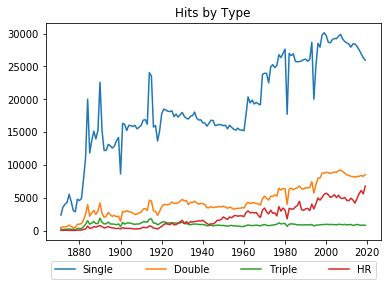

In [7]:
ZSingles = ZbattingTotals["1B"]
ZDoubles = ZbattingTotals["2B"]
ZTriples = ZbattingTotals["3B"]
ZHR = ZbattingTotals["HR"]
Zyear = ZbattingTotals["yearID"]
plt.plot(Zyear,ZSingles, label = 'Single')
plt.plot(Zyear,ZDoubles,label = 'Double')
plt.plot(Zyear,ZTriples,label='Triple')
plt.plot(Zyear,ZHR,label='HR')
plt.title("Hits by Type")
plt.legend(bbox_to_anchor = (0,-0.2,1,1.5), loc='lower left', mode="expand", ncol=4)

<BarContainer object of 22 artists>

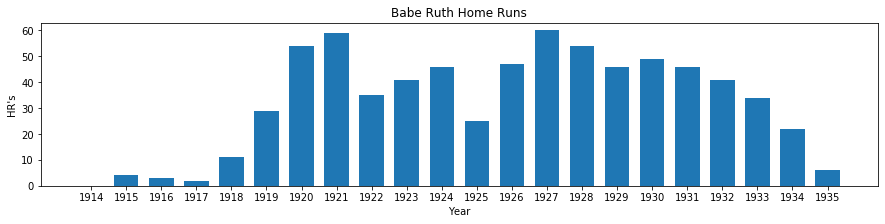

In [8]:
ZBabe_Ruth = baseballstats[baseballstats["FULL NAME"] == "Babe Ruth"]
ZBR_Year = ZBabe_Ruth["yearID"]
ZBR_HR = ZBabe_Ruth["HR"]
plt.figure(figsize=(15,3))
plt.xticks(range(len(ZBR_Year)), ZBR_Year)
plt.xlabel('Year')
plt.ylabel("HR's")
plt.title('Babe Ruth Home Runs')
plt.bar(range(len(ZBR_Year)), ZBR_HR, width = 0.7)
